In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit, KFold
import matplotlib.pyplot as plt
from scipy import sparse
from itertools import product
from time import time
import seaborn

from baseUtils import *
X     = sparse.load_npz("data-cleaned/recipes.npz")
Xhat  = sparse.load_npz("data-cleaned/recipes_tfidf.npz")
U     = sparse.load_npz("data-cleaned/user_train.npz")
Uhat  = sparse.load_npz("data-cleaned/user_train_tfidf.npz")
Utest = sparse.load_npz("data-cleaned/user_test.npz")

In [2]:
#check average/highest possible score
possible = X.nonzero()
num_rec = X.shape[0]
total = np.array([len(X[i].nonzero()[0]) for i in range(num_rec)])
                  
print(f"Highest possible: {max(total)}")
print(f"Average possible: {total.mean()}")

Highest possible: 79
Average possible: 27.45369534120551


In [3]:
print(f"Std: {total.std()}")

Std: 7.784848437224277


In [4]:
cv = 7
rs = KFold(n_splits=cv)

scores = []
for train_index, test_index in rs.split(X):
    closest = np.random.choice(np.arange(X.shape[0]), size=(len(test_index),5))
    #save score
#     for rec, t in zip(closest, test_index):
#         scores.append( recommendation_score(np.array([t]), rec) )
    scores.append( recommend_scoring(test_index.reshape(-1,1), closest))

print(f"Average random score: {np.concatenate(scores).mean()}")

Average random score: 7.194892996381792


(array([1.1700e+03, 2.5671e+04, 6.9870e+04, 4.9427e+04, 2.3334e+04,
        7.4480e+03, 1.1350e+03, 1.8400e+02, 2.0000e+01, 6.0000e+00]),
 array([ 5. , 12.4, 19.8, 27.2, 34.6, 42. , 49.4, 56.8, 64.2, 71.6, 79. ]),
 <a list of 10 Patch objects>)

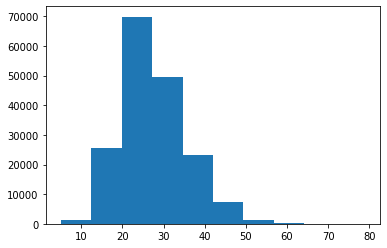

In [5]:
plt.hist(total)